# Space_filling_model_interface
We dissect non-hierarchical and hierarchical Voronoi  interfaces in macro-molecular complexes.

In the sequel, we consider the following complexes:
* 1VFB: an antibody (chains A and B) - protein antigen (chain C) complex
* 2AJF: a protein (spike of SARS-COV-2) and its receptor (RBD)
     
For both, we first compute the non-hierarchical Voronoi interface, which just requires specifying which chains make up the two partner.
For 1vfb, we further exploit the decomposition of the IG into its H and L chains, which yields a hierarchical Voronoi interface.



## Computing  the non-hierarchical Voronoi interfaces

In [13]:
import re  #regular expressions
import sys #misc system
import os
import shutil # python 3 only
import matplotlib.pyplot as plt

odir = "results"
if not os.path.exists(odir): os.system( ("mkdir %s" % odir) )
       
   
ifiles = ["data/1vfb.pdb",  "data/2ajf.pdb"]
partners = [("AB", "C"),   ("A", "E")]
def compute_AB_interface(ifile, partners, radius = 0., bsa = False):
    if not os.path.exists(odir): os.system( ("mkdir %s" % odir) )

    exe = shutil.which("sbl-intervor-ABW-atomic.exe")
    if not exe:
        print("Executable sbl-intervor-ABW-atomic.exe not found, exiting")
        return
    
    cmd = "%s -f %s -P %s -P %s --directory %s --verbose --output-prefix \
          --log --interface-viewer vmd --radius-water %f" \
          % (exe,ifile, partners[0], partners[1],odir, radius)
    if bsa:
        cmd += " --bsa"
    print(("Running %s" % cmd))
    os.system(cmd)

    # list output files
    cmd = "ls %s" % odir
    ofnames = os.popen(cmd).readlines()
    print("\nAll output files:",ofnames)

   
print("Marker : Calculation Started")
compute_AB_interface(ifiles[0], partners[0], 1.4, bsa = True)
compute_AB_interface(ifiles[1], partners[1], 1.4)
 

print("Marker : Calculation Ended")


Marker : Calculation Started
Running /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-intervor-ABW-atomic.exe -f data/1vfb.pdb -P AB -P C --directory results --verbose --output-prefix           --log --interface-viewer vmd --radius-water 1.400000 --bsa

All output files: ['sbl-intervor-ABW-atomic__AB__interfaces.xml\n', 'sbl-intervor-ABW-atomic__radius_water_1dot4__f_1vfb__P_AB__P_C___alpha_0__AB__interfaces.vmd\n', 'sbl-intervor-ABW-atomic__radius_water_1dot4__f_1vfb__P_AB__P_C___alpha_0__AB__interfaces.xml\n', 'sbl-intervor-ABW-atomic__radius_water_1dot4__f_1vfb__P_AB__P_C___alpha_0__buried_surface_area.xml\n', 'sbl-intervor-ABW-atomic__radius_water_1dot4__f_1vfb__P_AB__P_C___alpha_0__log.txt\n', 'sbl-intervor-ABW-atomic__radius_water_1dot4__f_1vfb__P_AB__P_C___alpha_0__structure_classifier.xml\n', 'sbl-intervor-ABW-atomic__radius_water_1dot4__f_2ajf__P_A__P_E___alpha_0__AB__interfaces.vmd\n', 'sbl-intervor-ABW-atomic__radius_water_1dot4__f_2ajf__P_A__P_E___alpha_0__AB__inte

## Visualization with VMD

This package offers  two sources of visualization:
* Interface atoms centric: the vmd file delivered by **sbl-intervor-ABW-atomic.exe**
* Interface residues centric: the vmd selection file delivered by **sbl-intervor-ABW-atomic-interface-string.py**
We illustrate these on two complexes below. Note that for each row, the first three images display the output of the Voronoi interface calculation. For the last images, we created a VMD selection displaying all atoms of all interface amino acids.


Top row: antibody-antigen complex
Top row: portion of spike of SARS-COV-2 in complex with its RBD


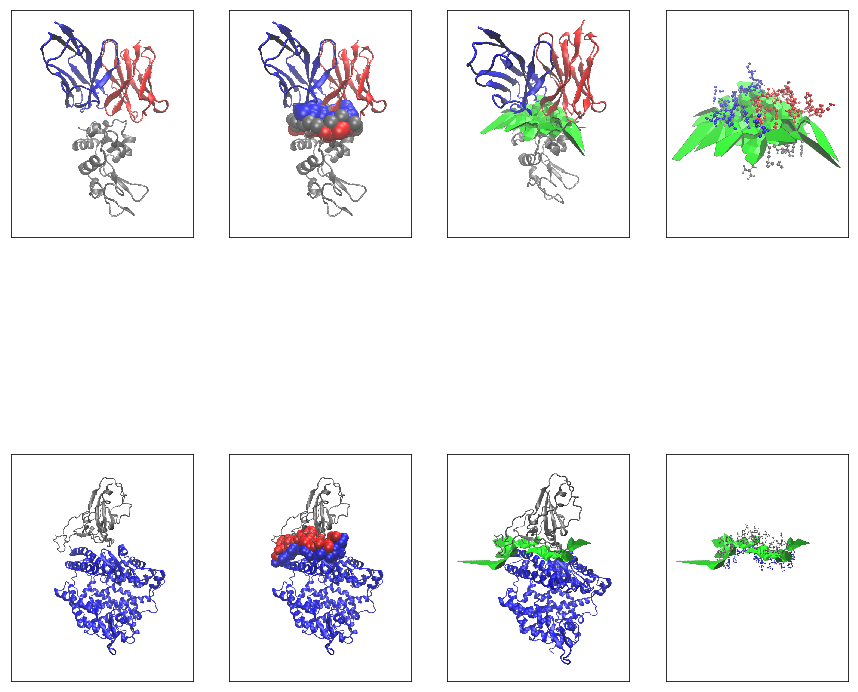

In [21]:
import matplotlib.pyplot as plt
from PIL import Image


fig, ax = plt.subplots(2, 4, figsize=(15,15))

map(lambda axi: axi.set_xticks([]), ax.ravel())

images_1vfb = ["fig/1vfb-complex.png", "fig/1vfb-interface-atoms.png", "fig/1vfb-voronoi-interface.png", "fig/1vfb-interface-residues-all-atoms.png"]
images_2ajf = ["fig/2ajf-complex.png", "fig/2ajf-interface-atoms.png", "fig/2ajf-voronoi-interface.png",     "fig/2ajf-interface-residues-all-atoms.png"]

print("Top row: antibody-antigen complex")
print("Top row: portion of spike of SARS-COV-2 in complex with its RBD")
 
for i in range(0,4):       
    ax[0, i].set_xticks([]); ax[0, i].set_yticks([])
    ax[0, i].imshow( Image.open(images_1vfb[i]) )
    
    ax[1, i].set_xticks([]); ax[1, i].set_yticks([])
    ax[1, i].imshow( Image.open(images_2ajf[i]) )
    
#fig.show()

##   Statistics with PALSE

Bicolor and mediated interfaces come with a number of built-in
   geometric and topological statistics,  which are provided per
   connected components -- aka binding patches:
topology, geometry, biochemistry.
 

Tricolor interfaces also have specific built-in statistics, in particular
topology and shelling order.

Such statistics are easily recovered from the files generated, using PALSE, as we illustrate on a couple of examples.
In all generality: just spot the label of interest in the XML file, and get the information with PALSE.


In [17]:
from SBL.PALSE import *

def analyze_with_palse():
    database = PALSE_xml_DB()
    odir = "results"
    #database.load_from_directory(odir)
    database.load_from_directory(odir,".*interfaces.xml")

    # interface AB
    num_atoms_at_AB = database.get_leftmost_data_values_from_database("AB_interface_output/AB_interface_statistics/number_of_particles", int)
    surface_areas_at_AB_with_A = database.get_leftmost_data_values_from_database("AB_interface_output/total_Voronoi_area_with_A", float)
    surface_areas_at_AB_with_B = database.get_leftmost_data_values_from_database("AB_interface_output/total_Voronoi_area_with_B", float)
  
    print("Num. atoms at the interface AB:",num_atoms_at_AB)
    print("Surface area, interface AB:", surface_areas_at_AB_with_A)
    #PALSE_statistic_handle.hist2d(surface_areas_at_AB, "hist-interface-areas-AB.eps")

   
    # interface ABW
    num_atoms_at_ABW = database.get_leftmost_data_values_from_database("ABW_interface_output/ABW_interface_statistics/number_of_particles", int)
    print("Num. atoms at the interface ABW:",num_atoms_at_ABW)
    surface_areas_at_ABW_with_A = database.get_leftmost_data_values_from_database("ABW_interface_output/total_Voronoi_area_with_A", float)
    surface_areas_at_ABW_with_B = database.get_leftmost_data_values_from_database("ABW_interface_output/total_Voronoi_area_with_B", float)
    print("Surface area, interface ABW:", surface_areas_at_ABW_with_A)
    
print("Marker : Calculation Started")
analyze_with_palse()
print("Marker : Calculation Ended")


Marker : Calculation Started
XML: 3 / 3 files were loaded

Num. atoms at the interface AB: [574, 154, 199]
Surface area, interface AB: [1213.0411651475317, 261.2199942850441, 764.9419501876393]
Num. atoms at the interface ABW: [793, 329, 246]
Surface area, interface ABW: [1872.825129408191, 724.0049088370517, 840.3806673038042]
Marker : Calculation Ended


# Visualizing the interface strings

In [22]:
import os
import subprocess

cmd = "mkdir resi"
os.system(cmd)

cmd = "sbl-intervor-ABW-atomic.exe -f data/2ajf.pdb -P A -P E -d resi"
os.system(cmd)

cmd = ["sbl-intervor-ABW-atomic-interface-string.py", "-f", "data/2ajf.pdb", "-p", "A", "-q", "E", "-d", "resi"]
s=subprocess.check_output(cmd, encoding='UTF-8')
print(s)

Ranges of aa for chains of partners: {'A': (19, 615), 'E': (323, 502)}
XML: 1 / 1 files were loaded

XML: 1 / 1 files were loaded


+++Dumping interface string for chain  A
--Min-max resids for string  A (19, 615)
--Chain  A  has  32  interface a.a.: [19, 23, 24, 26, 27, 28, 30, 31, 34, 37, 38, 41, 42, 45, 79, 82, 83, 324, 325, 326, 327, 329, 330, 353, 354, 355, 356, 357, 387, 388, 389, 393]
--Interface code:
S---EQ-KTF-DK--H--ED--YQ--L---------------------------------L--MY------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------TQGF-EN----------------------KGDFR-----------------------------AQP---R--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Computing the  hierarchical Voronoi  interface

In [3]:
def compute_AB_hierchical_interface():

  
    exe = shutil.which("sbl-intervor-IGAgW-atomic.exe")
    if not exe:
        print("Executable sbl-intervor-IGAgW-atomic.exe not found, exiting")
        return
    
    
    ifile = "data/1vfb.pdb"
    odir = "results-hierarchical"
    
    if not os.path.exists(odir): os.system( ("mkdir %s" % odir) )

    cmd = "%s -f %s --igL A --igH B --ag C  --directory %s --verbose --output-prefix --log --interface-viewer vmd" % (exe,ifile,odir)
    os.system(cmd)
    # list output files
    
    cmd = "ls %s" % odir
    ofnames = os.popen(cmd).readlines()
    print("\nAll output files:",ofnames)
    
print("Marker : Calculation Started")
compute_AB_hierchical_interface()
print("Marker : Calculation Ended")


Marker : Calculation Started

All output files: ['sbl-intervor-IGAgW-atomic__radius_water_1dot4__f_1vfb__igL_A__igH_B__ag_C__alpha_0__AgIG__interfaces.vmd\n', 'sbl-intervor-IGAgW-atomic__radius_water_1dot4__f_1vfb__igL_A__igH_B__ag_C__alpha_0__AgIG__interfaces.xml\n', 'sbl-intervor-IGAgW-atomic__radius_water_1dot4__f_1vfb__igL_A__igH_B__ag_C__alpha_0__HAg__interfaces.vmd\n', 'sbl-intervor-IGAgW-atomic__radius_water_1dot4__f_1vfb__igL_A__igH_B__ag_C__alpha_0__HAg__interfaces.xml\n', 'sbl-intervor-IGAgW-atomic__radius_water_1dot4__f_1vfb__igL_A__igH_B__ag_C__alpha_0__LAg__interfaces.vmd\n', 'sbl-intervor-IGAgW-atomic__radius_water_1dot4__f_1vfb__igL_A__igH_B__ag_C__alpha_0__LAg__interfaces.xml\n', 'sbl-intervor-IGAgW-atomic__radius_water_1dot4__f_1vfb__igL_A__igH_B__ag_C__alpha_0__LH__interfaces.vmd\n', 'sbl-intervor-IGAgW-atomic__radius_water_1dot4__f_1vfb__igL_A__igH_B__ag_C__alpha_0__LH__interfaces.xml\n', 'sbl-intervor-IGAgW-atomic__radius_water_1dot4__f_1vfb__igL_A__igH_B__ag_C__alp

Under VMD, we can now visualize in turn (i) the whole IG-Ag interface, 
(ii) the interafce between the heavy chain and the antigen,
(iii) the interface between the light  chain and the antigen,
and (iv) the interface between the H and L chains.